## prove xgboost can overfit this problem

## prove simple nn can overfit this problem

### The conclusion of this experiment is that the embeddings from the pretrained model significantly distinguish differences


In [238]:
import os
import torch

In [239]:
image_folder_path = (
    "/Users/user/Documents/Coding/cro_location_intelligence/notebook/data/full_image"
)
image_name_list = os.listdir(image_folder_path)
image_name_list.sort()
image_name_list = [
    image_name for image_name in image_name_list if not image_name.startswith(".")
]
image_path_list = [
    os.path.join(image_folder_path, image_name) for image_name in image_name_list
]

In [240]:
import pandas as pd

data_path = (
    "/Users/user/Documents/Coding/cro_location_intelligence/notebook/7 BE for Ford.xlsx"
)
df_dict = pd.read_excel(data_path, sheet_name=None)
store_id_list = df_dict["Train"]["store_id"].tolist()
store_id_list += df_dict["Test2022"]["store_id"].tolist()
store_id_list = [str(i) for i in store_id_list]
print(len(store_id_list))
print(store_id_list[:5])

1066
['1025', '8396', '8572', '1058', '1095']


In [241]:
store_id_we_have = []
for image_name in image_name_list:
    store_id_we_have.append(image_name.split(".")[0])
print(len(store_id_we_have))
print(store_id_we_have[:5])

9997
['10', '100', '1000', '10000', '10001']


In [242]:
store_id_we_dont_have = []
for id in store_id_list:
    if id not in store_id_we_have:
        print(id)
        store_id_we_dont_have.append(id)

print(len(store_id_we_dont_have))

4926
5350
5651
6034
6298
9143
9295
9364
9381
9385
9454
11022
11185
11397
11413
12007
13099
13218
13947
14422
17542
21


In [243]:
len(store_id_list)

1066

In [244]:
a = """store_id,sum_pop_in_voronoi,voronoi_area,voronoi_density,cro_open_year,CRO_store_length,CRO_store_parking,CRO_store_stock_area,CRO_store_total_area,CRO_store_width,CRO_store_shophouse_blocks,store_sales_area,latitude,longitude,prdct_AC,prdct_DC,prdct_FM,prdct_FP,prdct_GP,prdct_KS,prdct_SP,prdct_VF,prdct_XT,population,POIs_entry_point_50m,POIs_entry_point_200m,POIs_entry_point_300m,POIs_entry_point_500m,POIs_entry_point_1000m,POIs_entry_point_2000m,POIs_industrial_area_50m,POIs_industrial_area_200m,POIs_industrial_area_300m,POIs_industrial_area_500m,POIs_industrial_area_1000m,POIs_industrial_area_2000m,POIs_low_rise_residential_area_50m,POIs_low_rise_residential_area_200m,POIs_low_rise_residential_area_300m,POIs_low_rise_residential_area_500m,POIs_low_rise_residential_area_1000m,POIs_low_rise_residential_area_2000m,POIs_market_area_50m,POIs_market_area_200m,POIs_market_area_300m,POIs_market_area_500m,POIs_market_area_1000m,POIs_market_area_2000m,POIs_tourism_area_50m,POIs_tourism_area_200m,POIs_tourism_area_300m,POIs_tourism_area_500m,POIs_tourism_area_1000m,POIs_tourism_area_2000m,POIs_high_rise_residential_50m,POIs_high_rise_residential_200m,POIs_high_rise_residential_300m,POIs_high_rise_residential_500m,POIs_high_rise_residential_1000m,POIs_high_rise_residential_2000m,POIs_government_area_50m,POIs_government_area_200m,POIs_government_area_300m,POIs_government_area_500m,POIs_government_area_1000m,POIs_government_area_2000m,POIs_entertainment_area_50m,POIs_entertainment_area_200m,POIs_entertainment_area_300m,POIs_entertainment_area_500m,POIs_entertainment_area_1000m,POIs_entertainment_area_2000m,POIs_gas_stations_50m,POIs_gas_stations_200m,POIs_gas_stations_300m,POIs_gas_stations_500m,POIs_gas_stations_1000m,POIs_gas_stations_2000m,POIs_public_transportation_50m,POIs_public_transportation_200m,POIs_public_transportation_300m,POIs_public_transportation_500m,POIs_public_transportation_1000m,POIs_public_transportation_2000m,POIs_healthcare_centers_50m,POIs_healthcare_centers_200m,POIs_healthcare_centers_300m,POIs_healthcare_centers_500m,POIs_healthcare_centers_1000m,POIs_healthcare_centers_2000m,POIs_office_building_50m,POIs_office_building_200m,POIs_office_building_300m,POIs_office_building_500m,POIs_office_building_1000m,POIs_office_building_2000m,POIs_housing_residential_area_50m,POIs_housing_residential_area_200m,POIs_housing_residential_area_300m,POIs_housing_residential_area_500m,POIs_housing_residential_area_1000m,POIs_housing_residential_area_2000m,POIs_transportation_center_50m,POIs_transportation_center_200m,POIs_transportation_center_300m,POIs_transportation_center_500m,POIs_transportation_center_1000m,POIs_transportation_center_2000m,POIs_education_area_50m,POIs_education_area_200m,POIs_education_area_300m,POIs_education_area_500m,POIs_education_area_1000m,POIs_education_area_2000m,POIs_competitors_50m,POIs_competitors_200m,POIs_competitors_300m,POIs_competitors_500m,POIs_competitors_1000m,POIs_competitors_2000m,main_profile_NDF,main_profile_คมนาคมสาธารณะ,main_profile_ที่พักอาศัย/ตลาด,main_profile_ปั๊มน้ำมัน,main_profile_สถานที่ท่องเที่ยว,main_profile_สถานบันเทิง,main_profile_สถานศึกษา,main_profile_สำนักงาน,main_profile_โรงงาน,main_profile_โรงพยาบาล,sub_profile_NDF,sub_profile_คมนาคมสาธารณะ,sub_profile_ที่พักอาศัย/ตลาด,sub_profile_ปั๊มน้ำมัน,sub_profile_สถานบันเทิง,sub_profile_สถานศึกษา,sub_profile_สำนักงาน,sub_profile_โรงงาน,sub_profile_โรงพยาบาล,strategic_location_4 เหล่าทัพ,strategic_location_Community/MiniMall/ห้างสรรพสินค้า,strategic_location_NDF,strategic_location_Office Building,strategic_location_การเคหะ,strategic_location_คอนโด (เซ็นสัญญากลุ่ม),strategic_location_คอนโด (เซ็นสัญญาเดี่ยว),strategic_location_ทำเลพิเศษอื่นๆ,strategic_location_ที่อยู่อาศัย เฉพาะเซ็นสัญญากลุ่ม (BSP),strategic_location_มหาวิทยาลัย/ราชภัฏ/วิทยาลัย/เทคนิค,strategic_location_สนามบิน,strategic_location_แนวรถไฟฟ้า,strategic_location_โรงงาน/นิคมอุตสาหกรรม,strategic_location_โรงพยาบาลชั้นหนึ่ง รัฐบาล/เอกชน,strategic_location_โรงเรียนประถม-มัธยมประจำจังหวัด,strategic_location_ไม่ใช่ Strategic Location,CRO_store_type_BU,CRO_store_type_Booth,CRO_store_type_SA,CRO_store_type_SH,CRO_store_franchise_Co,CRO_store_franchise_PTTOR,CRO_store_franchise_SBP,open_month,y_nor,green_wkday_12_cr_0,green_wkday_12_cr_1,green_wkday_12_cr_2,green_wkday_12_cr_3,green_wkday_12_cr_4,green_wkday_12_cr_5,green_wkday_12_cr_6,green_wkday_12_cr_7,orange_wkday_12_cr_0,orange_wkday_12_cr_1,orange_wkday_12_cr_2,orange_wkday_12_cr_3,orange_wkday_12_cr_4,orange_wkday_12_cr_5,orange_wkday_12_cr_6,orange_wkday_12_cr_7,red_wkday_12_cr_0,red_wkday_12_cr_1,red_wkday_12_cr_2,red_wkday_12_cr_3,red_wkday_12_cr_4,red_wkday_12_cr_5,red_wkday_12_cr_6,red_wkday_12_cr_7,maroon_wkday_12_cr_0,maroon_wkday_12_cr_1,maroon_wkday_12_cr_2,maroon_wkday_12_cr_3,maroon_wkday_12_cr_4,maroon_wkday_12_cr_5,maroon_wkday_12_cr_6,maroon_wkday_12_cr_7,green_wkday_18_cr_0,green_wkday_18_cr_1,green_wkday_18_cr_2,green_wkday_18_cr_3,green_wkday_18_cr_4,green_wkday_18_cr_5,green_wkday_18_cr_6,green_wkday_18_cr_7,orange_wkday_18_cr_0,orange_wkday_18_cr_1,orange_wkday_18_cr_2,orange_wkday_18_cr_3,orange_wkday_18_cr_4,orange_wkday_18_cr_5,orange_wkday_18_cr_6,orange_wkday_18_cr_7,red_wkday_18_cr_0,red_wkday_18_cr_1,red_wkday_18_cr_2,red_wkday_18_cr_3,red_wkday_18_cr_4,red_wkday_18_cr_5,red_wkday_18_cr_6,red_wkday_18_cr_7,maroon_wkday_18_cr_0,maroon_wkday_18_cr_1,maroon_wkday_18_cr_2,maroon_wkday_18_cr_3,maroon_wkday_18_cr_4,maroon_wkday_18_cr_5,maroon_wkday_18_cr_6,maroon_wkday_18_cr_7,green_wkend_12_cr_0,green_wkend_12_cr_1,green_wkend_12_cr_2,green_wkend_12_cr_3,green_wkend_12_cr_4,green_wkend_12_cr_5,green_wkend_12_cr_6,green_wkend_12_cr_7,orange_wkend_12_cr_0,orange_wkend_12_cr_1,orange_wkend_12_cr_2,orange_wkend_12_cr_3,orange_wkend_12_cr_4,orange_wkend_12_cr_5,orange_wkend_12_cr_6,orange_wkend_12_cr_7,red_wkend_12_cr_0,red_wkend_12_cr_1,red_wkend_12_cr_2,red_wkend_12_cr_3,red_wkend_12_cr_4,red_wkend_12_cr_5,red_wkend_12_cr_6,red_wkend_12_cr_7,maroon_wkend_12_cr_0,maroon_wkend_12_cr_1,maroon_wkend_12_cr_2,maroon_wkend_12_cr_3,maroon_wkend_12_cr_4,maroon_wkend_12_cr_5,maroon_wkend_12_cr_6,maroon_wkend_12_cr_7,green_wkend_18_cr_0,green_wkend_18_cr_1,green_wkend_18_cr_2,green_wkend_18_cr_3,green_wkend_18_cr_4,green_wkend_18_cr_5,green_wkend_18_cr_6,green_wkend_18_cr_7,orange_wkend_18_cr_0,orange_wkend_18_cr_1,orange_wkend_18_cr_2,orange_wkend_18_cr_3,orange_wkend_18_cr_4,orange_wkend_18_cr_5,orange_wkend_18_cr_6,orange_wkend_18_cr_7,red_wkend_18_cr_0,red_wkend_18_cr_1,red_wkend_18_cr_2,red_wkend_18_cr_3,red_wkend_18_cr_4,red_wkend_18_cr_5,red_wkend_18_cr_6,red_wkend_18_cr_7,maroon_wkend_18_cr_0,maroon_wkend_18_cr_1,maroon_wkend_18_cr_2,maroon_wkend_18_cr_3,maroon_wkend_18_cr_4,maroon_wkend_18_cr_5,maroon_wkend_18_cr_6,maroon_wkend_18_cr_7,road_length_path_cr_0,road_length_path_cr_1,road_length_path_cr_2,road_length_path_cr_3,road_length_path_cr_4,road_length_path_cr_5,road_length_path_cr_6,road_length_path_cr_7,road_length_bus_stop_cr_0,road_length_bus_stop_cr_1,road_length_bus_stop_cr_2,road_length_bus_stop_cr_3,road_length_bus_stop_cr_4,road_length_bus_stop_cr_5,road_length_bus_stop_cr_6,road_length_bus_stop_cr_7,road_length_track_cr_0,road_length_track_cr_1,road_length_track_cr_2,road_length_track_cr_3,road_length_track_cr_4,road_length_track_cr_5,road_length_track_cr_6,road_length_track_cr_7,road_length_trunk_cr_0,road_length_trunk_cr_1,road_length_trunk_cr_2,road_length_trunk_cr_3,road_length_trunk_cr_4,road_length_trunk_cr_5,road_length_trunk_cr_6,road_length_trunk_cr_7,road_length_primary_cr_0,road_length_primary_cr_1,road_length_primary_cr_2,road_length_primary_cr_3,road_length_primary_cr_4,road_length_primary_cr_5,road_length_primary_cr_6,road_length_primary_cr_7,road_length_footway_cr_0,road_length_footway_cr_1,road_length_footway_cr_2,road_length_footway_cr_3,road_length_footway_cr_4,road_length_footway_cr_5,road_length_footway_cr_6,road_length_footway_cr_7,road_length_secondary_cr_0,road_length_secondary_cr_1,road_length_secondary_cr_2,road_length_secondary_cr_3,road_length_secondary_cr_4,road_length_secondary_cr_5,road_length_secondary_cr_6,road_length_secondary_cr_7,road_length_tertiary_cr_0,road_length_tertiary_cr_1,road_length_tertiary_cr_2,road_length_tertiary_cr_3,road_length_tertiary_cr_4,road_length_tertiary_cr_5,road_length_tertiary_cr_6,road_length_tertiary_cr_7,road_length_unclassified_cr_0,road_length_unclassified_cr_1,road_length_unclassified_cr_2,road_length_unclassified_cr_3,road_length_unclassified_cr_4,road_length_unclassified_cr_5,road_length_unclassified_cr_6,road_length_unclassified_cr_7,road_length_service_cr_0,road_length_service_cr_1,road_length_service_cr_2,road_length_service_cr_3,road_length_service_cr_4,road_length_service_cr_5,road_length_service_cr_6,road_length_service_cr_7,road_length_residential_cr_0,road_length_residential_cr_1,road_length_residential_cr_2,road_length_residential_cr_3,road_length_residential_cr_4,road_length_residential_cr_5,road_length_residential_cr_6,road_length_residential_cr_7,prov_namt_กรุงเทพมหานคร,prov_namt_ปทุมธานี,store_franchise_Co,store_franchise_SBP,subset"""
a = a.split(",")
print(len(a))
print("y_nor" in a)

385
True


In [245]:
# feed model net
from urllib.request import urlopen
from PIL import Image
import timm
from tqdm import tqdm

# new_df_path = "/Users/user/Documents/Coding/cro_location_intelligence/notebook/7 lat long with embedding.csv"
new_df_path = "/Users/user/Documents/Coding/cro_location_intelligence/src/data/all_data_embedding.csv"
if not os.path.exists(new_df_path):
    old_df_path = "/Users/user/Documents/Coding/cro_location_intelligence/src/data/all_data_embedding_old.csv"
    # merge old embedding with new data
    data_path = (
        "/Users/user/Documents/Coding/cro_location_intelligence/src/data/all_data.csv"
    )
    old_df = pd.read_csv(old_df_path)
    df = pd.read_csv(data_path)
    # merge old_df to df with store_id
    df = pd.merge(
        df, old_df.filter(regex="^embedding_.*|store_id$"), on="store_id", how="left"
    )
    # save
    df.to_csv(new_df_path, index=False)

    # output_dict = {}
    # model = timm.create_model(
    #     "maxvit_tiny_tf_512.in1k",
    #     pretrained=True,
    #     num_classes=0,  # remove classifier nn.Linear
    # )
    # model = model.eval()
    # data_config = timm.data.resolve_model_data_config(model)
    # transforms = timm.data.create_transform(**data_config, is_training=False)

    # # for image_name in image_name_list:
    # batch_size = 4
    # # check is file exist

    # check_store_id_list = []
    # for store_id in store_id_list:
    #     image_name = store_id + ".png"
    #     image_path = os.path.join(image_folder_path, image_name)
    #     if os.path.exists(image_path):
    #         check_store_id_list.append(store_id)
    # store_id_list = check_store_id_list
    # print("len(store_id_list)", len(store_id_list))
    # # Iterate through store_ids in batches
    # for batch_start in tqdm(
    #     range(0, len(store_id_list), batch_size), desc="store_id batches"
    # ):
    #     batch_store_ids = store_id_list[batch_start : batch_start + batch_size]
    #     batch_images = []

    #     # Load and preprocess images in the current batch
    #     for store_id in batch_store_ids:
    #         image_name = store_id + ".png"
    #         image_path = os.path.join(image_folder_path, image_name)
    #         img = Image.open(image_path).convert("RGB")
    #         batch_images.append(transforms(img))

    #     # Stack images to create a batch
    #     batch_images = torch.stack(batch_images)

    #     # Forward pass for the batch
    #     with torch.no_grad():
    #         output = model.forward_features(batch_images)
    #         output = model.forward_head(output, pre_logits=True)

    #     # Store results in output_dict
    #     for i, store_id in enumerate(batch_store_ids):
    #         output_dict[store_id] = output.detach().numpy()[i]
    #     # output is a (1, num_features) shaped tensor

    # output_df = pd.DataFrame.from_dict(output_dict, orient="index")
    # output_df.head()
    # output_df.columns = ["embedding_" + str(col + 1) for col in output_df.columns]
    # # convert output_df store_id to int
    # output_df["store_id"] = output_df.index
    # output_df.store_id = output_df.store_id.astype(int)
    # data_path = (
    #     "/Users/user/Documents/Coding/cro_location_intelligence/src/data/all_data.csv"
    # )
    # df = pd.read_csv(data_path)
    # # merge df with output_df with columns store_id
    # df = pd.merge(df, output_df, on="store_id", how="inner")

    # # df = pd.concat([df, output_df], axis=1)
    # df.to_csv(new_df_path, index=False)
else:
    df = pd.read_csv(new_df_path)
    df.head()

In [246]:
import numpy as np

r = 2
circle_area = np.pi * r**2
square_area = (2 * r) ** 2
circle_area, square_area, circle_area / square_area

(12.566370614359172, 16, 0.7853981633974483)

In [247]:
# find nan in df
df.isnull().sum()
# drop nan
df = df.dropna()

In [248]:
# rename columns by add prefix "embedding_"

In [249]:
# merge 2 df by index
import pandas as pd

# # convert output_dict to dataframe
# if os.path.exists(new_df_path) is False:
#     output_df = pd.DataFrame.from_dict(output_dict, orient="index")
#     output_df.head()
#     output_df.columns = ["embedding_" + str(col + 1) for col in output_df.columns]
#     # convert output_df store_id to int
#     output_df["store_id"] = output_df.index
#     output_df.store_id = output_df.store_id.astype(int)
#     data_path = (
#         "/Users/user/Documents/Coding/cro_location_intelligence/src/data/all_data.csv"
#     )
#     df = pd.read_csv(data_path)
#     # merge df with output_df with columns store_id
#     df = pd.merge(df, output_df, on="store_id", how="inner")

#     # df = pd.concat([df, output_df], axis=1)
#     df.to_csv(new_df_path, index=False)
# else:
#     df = pd.read_csv(new_df_path)
#     df.head()

In [250]:
print(df.columns.to_list())

['store_id', 'sum_pop_in_voronoi', 'voronoi_area', 'voronoi_density', 'cro_open_year', 'CRO_store_length', 'CRO_store_parking', 'CRO_store_stock_area', 'CRO_store_total_area', 'CRO_store_width', 'CRO_store_shophouse_blocks', 'store_sales_area', 'latitude', 'longitude', 'prdct_AC', 'prdct_DC', 'prdct_FM', 'prdct_FP', 'prdct_GP', 'prdct_KS', 'prdct_SP', 'prdct_VF', 'prdct_XT', 'population', 'POIs_entry_point_50m', 'POIs_entry_point_200m', 'POIs_entry_point_300m', 'POIs_entry_point_500m', 'POIs_entry_point_1000m', 'POIs_entry_point_2000m', 'POIs_industrial_area_50m', 'POIs_industrial_area_200m', 'POIs_industrial_area_300m', 'POIs_industrial_area_500m', 'POIs_industrial_area_1000m', 'POIs_industrial_area_2000m', 'POIs_low_rise_residential_area_50m', 'POIs_low_rise_residential_area_200m', 'POIs_low_rise_residential_area_300m', 'POIs_low_rise_residential_area_500m', 'POIs_low_rise_residential_area_1000m', 'POIs_low_rise_residential_area_2000m', 'POIs_market_area_50m', 'POIs_market_area_200m'

In [251]:
# check is it has y_nor df.columns
if "y_nor" in df.columns:
    print("y_nor")

y_nor


In [252]:
# use embedding to predict mockup_sale with xgboost
from sklearn.model_selection import train_test_split
import xgboost as xgb
import numpy as np

# linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

# get all column has embedding_ prefix
# feature_columns = [col for col in df.columns if col.startswith("embedding_")]
# feature_columns += ["subset"]
# feature_columns += ["y_nor"]
# assign to x
# all_data = df[feature_columns]
all_data = df.copy()

In [253]:
# remove column startswith embedding_
all_data = all_data.loc[:, ~all_data.columns.str.startswith("embedding_")]
all_data.head()

,store_id,sum_pop_in_voronoi,voronoi_area,voronoi_density,cro_open_year,CRO_store_length,CRO_store_parking,CRO_store_stock_area,CRO_store_total_area,CRO_store_width,...,road_length_residential_cr_3,road_length_residential_cr_4,road_length_residential_cr_5,road_length_residential_cr_6,road_length_residential_cr_7,prov_namt_กรุงเทพมหานคร,prov_namt_ปทุมธานี,store_franchise_Co,store_franchise_SBP,subset
0,1025.0,16369.32,38412.2,0.426149,16.0,20.00,0.0,97.39,274.39,14.00,...,77.783004,84.454770,92.006420,120.813019,137.299551,1,0,0,1,train
1,8396.0,15736.69,241705.5,0.065107,16.0,15.35,0.0,44.86,175.86,19.80,...,157.117009,156.780832,163.828702,144.524316,153.055289,1,0,0,1,train
2,8572.0,16156.14,193980.1,0.083288,16.0,9.85,0.0,12.90,145.90,17.80,...,88.553455,86.053817,66.272860,73.498362,69.179231,1,0,1,0,train
3,1058.0,11213.96,77343.2,0.144990,16.0,13.94,0.0,11.83,93.83,7.90,...,145.375304,151.805544,163.678876,90.233285,123.416384,0,1,1,0,train
4,1095.0,16216.47,90980.3,0.178242,16.0,15.82,0.0,35.18,113.18,7.94,...,129.253148,178.432519,189.934764,143.326666,133.012108,1,0,1,0,train


In [254]:
if "y_nor" not in all_data.columns:
    print("y_nor")
if "store_id" not in all_data.columns:
    print("store_id")

In [255]:
from sklearn.preprocessing import StandardScaler

# Assuming all_data is a pandas DataFrame
all_data = all_data.drop(columns=["y_nor"])

# Separate the training data for normalization
train_all_data = all_data[all_data.subset == "train"]
train_store_ids = train_all_data["store_id"]

# Drop unnecessary columns for normalization
all_data = all_data.drop(columns=["subset", "store_id"])

# Normalize the remaining columns
scaler = StandardScaler()
scaler.fit(train_all_data.drop(columns=["subset", "store_id"]))
all_data_normalized = scaler.transform(all_data)
all_data_normalized = pd.DataFrame(all_data_normalized, columns=all_data.columns)

# Add back the store_id column
all_data_normalized["y_nor"] = df["y_nor"]
all_data_normalized["subset"] = df["subset"]
all_data_normalized["store_id"] = df["store_id"]

# If needed, convert store_id back to its original data type
all_data_normalized["store_id"] = all_data_normalized["store_id"].astype(int)
all_data = all_data_normalized.copy()
all_data.head()

,sum_pop_in_voronoi,voronoi_area,voronoi_density,cro_open_year,CRO_store_length,CRO_store_parking,CRO_store_stock_area,CRO_store_total_area,CRO_store_width,CRO_store_shophouse_blocks,...,road_length_residential_cr_5,road_length_residential_cr_6,road_length_residential_cr_7,prov_namt_กรุงเทพมหานคร,prov_namt_ปทุมธานี,store_franchise_Co,store_franchise_SBP,y_nor,subset,store_id
0,0.809053,-0.435626,1.276019,-0.585552,1.119992,-0.60246,1.958702,1.316572,-0.099400,1.694327,...,-1.012147,-0.368337,0.022957,0.419156,-0.419156,-0.960848,1.091138,0.226238,train,1025
1,0.587070,-0.246327,-0.271598,-0.585552,0.117934,-0.60246,-0.168104,-0.166140,0.836214,1.078724,...,0.513163,0.147987,0.375884,0.419156,-0.419156,-0.960848,1.091138,0.182798,train,8396
2,0.734251,-0.290767,-0.193664,-0.585552,-1.067295,-0.60246,-1.462083,-0.616988,0.513588,-0.768087,...,-1.558658,-1.398633,-1.502935,0.419156,-0.419156,1.040748,-0.916474,0.433002,train,8572
3,-0.999912,-0.399375,0.070823,-0.585552,-0.185915,-0.60246,-1.505405,-1.400555,-1.083407,0.463120,...,0.509981,-1.034223,-0.288025,-2.385745,2.385745,1.040748,-0.916474,0.221966,train,1058
4,0.755420,-0.386677,0.213359,-0.585552,0.219217,-0.60246,-0.560023,-1.109370,-1.076954,0.463120,...,1.067585,0.121908,-0.073082,0.419156,-0.419156,1.040748,-0.916474,0.149573,train,1095


In [256]:
# create train test with columns subset
x_train = all_data[all_data.subset == "train"]
x_train = x_train.drop(columns=["subset"])
y_train = x_train["y_nor"]
x_test = all_data[all_data.subset == "test"]
x_test = x_test.drop(columns=["subset"])
y_test = x_test["y_nor"]
x_train = x_train.drop(columns=["y_nor"])
x_test = x_test.drop(columns=["y_nor"])

In [257]:
x_train.shape, y_train.shape

((977, 383), (977,))

In [258]:
import matplotlib.pyplot as plt

mean_absolute_percentage_error: 1.076031445276195


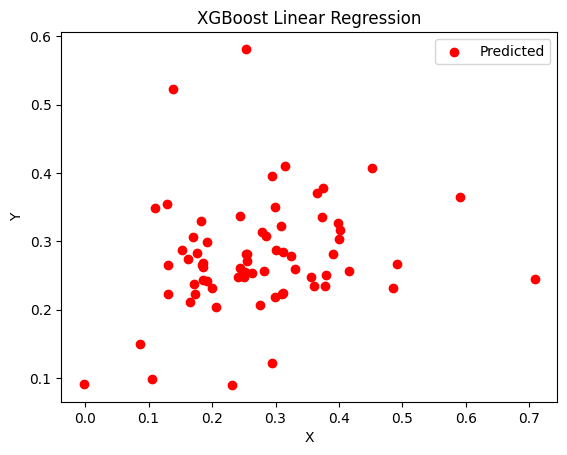

In [259]:
# Create an XGBoost regressor
regressor = xgb.XGBRegressor(objective="reg:squarederror", seed=42)

# Train the model
regressor.fit(x_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(x_test)

# Evaluate the model
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"mean_absolute_percentage_error: {mape}")

# Plot the results
# plt.scatter(x_test, y_test, color="black", label="Actual")
plt.scatter(y_test, y_pred, color="red", label="Predicted")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("XGBoost Linear Regression")
plt.legend()
plt.show()

In [260]:
if not torch.backends.mps.is_available():
    if not torch.backends.mps.is_built():
        print(
            "MPS not available because the current PyTorch install was not "
            "built with MPS enabled."
        )
    else:
        print(
            "MPS not available because the current MacOS version is not 12.3+ "
            "and/or you do not have an MPS-enabled device on this machine."
        )
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

Using mps device


In [261]:
from sklearn.model_selection import train_test_split

# Assuming X_train, X_test, y_train, y_test are NumPy arrays
X_train = np.array(x_train)
X_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# Extract store_id column from X_train, X_val, and X_test
store_id_train = X_train[:, -1]
store_id_val = X_val[:, -1]
store_id_test = X_test[:, -1]


# Remove store_id column from X_train, X_val, and X_test
X_train = X_train[:, :-1]
X_val = X_val[:, :-1]
X_test = X_test[:, :-1]


# Now, you have X_train_without_store_id, X_val_without_store_id, and X_test_without_store_id
# without the store_id column, and store_id_train, store_id_val, and store_id_test with only the store_id column

# If needed, convert store_id_train to its original data type
store_id_train = store_id_train.astype(int)
store_id_val = store_id_val.astype(int)
store_id_test = store_id_test.astype(int)

In [262]:
X_train.shape

(781, 382)

In [263]:
import torch.nn as nn

In [264]:
store_id_train.shape, store_id_val.shape, store_id_test.shape

((781,), (196,), (68,))

In [266]:
from typing import Any
from lightning.pytorch.utilities.types import STEP_OUTPUT
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import lightning as pl
from torch.nn import Dropout, BatchNorm1d
import torch.nn.functional as F
from torch.optim.lr_scheduler import StepLR
from torch.optim.lr_scheduler import ReduceLROnPlateau

from lightning.pytorch.loggers import TensorBoardLogger
from torch.nn import Linear, BatchNorm1d, Dropout
import timm


class MAPELoss(nn.Module):
    def forward(self, y_pred, y_true):
        epsilon = 1e-7
        percentage_error = torch.abs((y_true - y_pred) / (y_true + epsilon))
        mape = torch.mean(percentage_error) * 100.0
        return mape


# Define a simple dataset
class PriceDataset(Dataset):
    def __init__(
        self,
        store_ids,
        features,
        labels,
        transform_y=None,
        transform_x=None,
        transform_image=None,
        image_folder="/Users/user/Documents/Coding/cro_location_intelligence/notebook/data/crop_image",
    ):
        self.image_folder = image_folder
        self.store_ids = store_ids
        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.float32)
        self.transform_y = transform_y
        self.transform_x = transform_x
        self.transform_image = transform_image
        # for idx in range(len(self.features)):
        #     image_path = os.path.join(
        #         self.image_folder, str(self.store_ids[idx]) + ".png"
        #     )
        #     image = Image.open(image_path)

        #     # Check if the height is divisible by 16
        #     assert (
        #         image.size[1] % 16 == 0
        #     ), f"Image height ({image.size[1]}) is not divisible by 16."

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        feature = self.features[idx]
        store_id = self.store_ids[idx]
        image_path = os.path.join(self.image_folder, str(store_id) + ".png")

        # Load the image
        image = Image.open(image_path)
        # resize image
        desired_height = desired_width = 512
        image = image.resize((desired_height, desired_width))
        image = transforms.ToTensor()(image)
        # image = np.array(image)
        label = self.labels[idx]
        if self.transform_image:
            image = self.transform_image(image)
        if self.transform_x:
            feature = self.transform_x(feature)

        if self.transform_y:
            label = self.transform_y(label)

        return image, feature, label


class PricePredictor(pl.LightningModule):
    def __init__(
        self,
        input_size,
        image_model_name="maxvit_tiny_tf_512.in1k",
        layer_sizes=[],
        dropout_rate=0.7,
        last_layer_dropout_rate=0.1,
        use_batch_norm=True,
        lr=0.00001,
    ):
        super(PricePredictor, self).__init__()

        # Image processing model
        self.image_model = timm.create_model(
            image_model_name,
            pretrained=True,
            num_classes=0,
        ).to(device)
        for param in self.image_model.parameters():
            param.requires_grad = True
        # Additional features processing model
        layer_sizes = [input_size] + layer_sizes
        self.use_batch_norm = use_batch_norm
        self.layers = nn.ModuleList()
        self.layer_norms = nn.ModuleList()
        self.dropouts = nn.ModuleList()

        for i in range(1, len(layer_sizes)):
            self.layers.append(nn.Linear(layer_sizes[i - 1], layer_sizes[i]))

            if use_batch_norm:
                self.layer_norms.append(nn.LayerNorm(layer_sizes[i]))

            # Use last_layer_dropout_rate for the last layer, otherwise use dropout_rate
            if i == len(layer_sizes) - 1:
                self.dropouts.append(nn.Dropout(p=last_layer_dropout_rate))
            else:
                self.dropouts.append(nn.Dropout(p=dropout_rate))

        self.lr = lr
        self.val_loss = 0
        self.training_step_loss = []

    def forward(self, image, feature):
        # Process image
        image_features = self.image_model(image)
        image_features = image_features.view(image_features.size(0), -1)

        # Process additional features
        for i in range(len(self.layers)):
            if self.use_batch_norm:
                feature = F.leaky_relu(self.layer_norms[i](self.layers[i](feature)))
            else:
                feature = F.leaky_relu(self.layers[i](feature))

            feature = self.dropouts[i](feature)

        # Concatenate image and additional features
        combined_features = torch.cat([image_features, feature], dim=1)

        return combined_features

    def training_step(self, batch, batch_idx):
        data, feature, target = batch
        output = self(data, feature)
        loss = nn.MSELoss()(output.flatten(), target)
        self.training_step_loss.append(loss)

        # Log the loss on each training step
        self.log("train_loss", loss, on_step=True, on_epoch=False)
        # raise
        return loss

    # def on_training_epoch_end(self, outputs):
    #     # avg_loss = torch.tensor(self.training_step_loss).mean()
    #     # self.training_step_loss = []
    #     # avg_loss = torch.stack(
    #     #     [x.detach().cpu() for x in self.training_step_loss]
    #     # ).mean()
    #     # self.log("train_loss", avg_loss.item(), on_epoch=True)
    #     # print(x)
    #     avg_loss = torch.stack([x["loss"] for x in outputs]).mean()
    #     self.log("train_loss", avg_loss.item(), on_epoch=True)

    def validation_step(self, batch, batch_idx):
        data, feature, target = batch
        output = self(data, feature)
        loss = nn.MSELoss()(output.flatten(), target)
        self.val_loss = loss

        self.log("val_loss", loss)

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.lr)
        return optimizer


from lightning.pytorch.callbacks import LearningRateFinder


class FineTuneLearningRateFinder(LearningRateFinder):
    def __init__(self, milestones, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.milestones = milestones
        self._min_lr = 1e-6
        self._max_lr = 1e-1
        # self._num_training_steps = 1000
        self._mode = "linear"

    def on_fit_start(self, *args, **kwargs):
        return

    def on_train_epoch_start(self, trainer, pl_module):
        if trainer.current_epoch in self.milestones or trainer.current_epoch == 0:
            self.lr_find(trainer, pl_module)


from lightning.pytorch.callbacks.early_stopping import EarlyStopping


np.random.seed(42)


class AddNoise(object):
    def __init__(self, noise_level=0.01):
        self.noise_level = noise_level

    def __call__(self, x):
        # random apply 20% of the time
        if torch.rand(1) < 0.2:
            return x
        noise = torch.randn_like(x) * self.noise_level
        augmented_x = x + noise
        return augmented_x


from torchvision import transforms


def salt_and_pepper_noise(image, salt_prob=0.02, pepper_prob=0.02):
    """
    Apply salt-and-pepper noise to the image.

    Parameters:
    - image: PIL Image
    - salt_prob: Probability of adding salt noise
    - pepper_prob: Probability of adding pepper noise
    """
    image_array = np.array(image)
    height, width, _ = image_array.shape

    # Add salt noise
    salt_mask = np.random.rand(height, width) < salt_prob
    image_array[salt_mask] = 255

    # Add pepper noise
    pepper_mask = np.random.rand(height, width) < pepper_prob
    image_array[pepper_mask] = 0

    return Image.fromarray(image_array)


desired_height = desired_width = 512
transform_image = transforms.Compose(
    [
        # transforms.Resize((desired_height, desired_width)),
        transforms.RandomRotation(degrees=180),  # Random rotation up to 15 degrees
        transforms.RandomHorizontalFlip(
            p=0.5
        ),  # Random horizontal flip with a probability of 0.5
        # transforms.Lambda(lambda x: salt_and_pepper_noise(x)),  # Apply salt-and-pepper noise
        # transforms.ToTensor(),  # Convert the PIL image to a PyTorch tensor
        # Add more transformations if needed, such as normalization
    ]
)

transforms_x = AddNoise(noise_level=0.1)
transforms_y = AddNoise(noise_level=0.025)
# batch_size = 16
batch_size = 1

num_workers = 0
train_dataset = PriceDataset(
    store_id_train,
    X_train,
    y_train,
    transform_x=transforms_x,
    transform_y=transforms_y,
    transform_image=transform_image,
)
test_dataset = PriceDataset(store_id_test, X_test, y_test)
val_dataset = PriceDataset(store_id_val, X_val, y_val)
train_loader = DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers
)
test_loader = DataLoader(
    test_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers
)
val_loader = DataLoader(
    val_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers
)
from lightning.pytorch.callbacks import ModelCheckpoint

checkpoint_callback = ModelCheckpoint(
    dirpath="./models/",
    save_top_k=2,
    monitor="val_loss",
    filename="best_model-{epoch}",
)

# Initialize the model
input_size = X_train.shape[1:]

model = PricePredictor(input_size[0], layer_sizes=[256, 128, 32, 1]).to(device)

# model.load_from_checkpoint(check_point_path)


# Initialize a PyTorch Lightning Trainer
logger = TensorBoardLogger("tb_logs", name="my_model")


early_stop_callback = EarlyStopping(
    monitor="val_loss", min_delta=0.00, patience=50, verbose=False, mode="min"
)
trainer = pl.Trainer(
    callbacks=[
        # FineTuneLearningRateFinder(
        #     milestones=(
        #         100,
        #         1000,
        #         2000,
        #         3000,
        #         5000,
        #         10000,
        #     )
        # ),
        early_stop_callback,
        checkpoint_callback,
    ],
    min_epochs=20000,
    max_epochs=30000,
    logger=logger,
    precision="16-mixed",
    accelerator="mps",
)
# Train the model
trainer.fit(model, train_dataloaders=train_loader, val_dataloaders=val_loader)

# Test the model
trainer.test(dataloaders=test_loader)

# Make predictionss
model.to(device)
model.eval()
with torch.no_grad():
    example_input = torch.tensor(X_test[:5], dtype=torch.float32).to(device)
    predictions = model(example_input).flatten().cpu().numpy()

print("Example Predictions:", predictions)

Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name        | Type       | Params
-------------------------------------------
0 | image_model | MaxxVit    | 30.5 M
1 | layers      | ModuleList | 135 K 
2 | layer_norms | ModuleList | 834   
3 | dropouts    | ModuleList | 0     
-------------------------------------------
30.7 M    Trainable params
0         Non-trainable params
30.7 M    Total params
122.690   Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

In [ ]:
trainer.checkpoint_callback

In [ ]:
for i, (path, _) in enumerate(trainer.checkpoint_callback.best_k_models.items()):
    model = PricePredictor.load_from_checkpoint(path, input_size=input_size[0])
    PATH = f"./models/{i}th_best.pt"
    torch.save(model, PATH)
    print(PATH)
    # break

./models/0th_best.pt
./models/1th_best.pt


In [ ]:
# torch.save(model.state_dict(), PATH)

In [ ]:
model.device

device(type='mps', index=0)

In [ ]:
# checkpoint_path = "/Users/user/Documents/Coding/cro_location_intelligence/src/models_version34/best_model-epoch=353.ckpt"
# # model = PricePredictor.load_from_checkpoint(
# #     checkpoint_path=checkpoint_path,
# #     input_size=input_size[0],
# #     use_mps_device=True,
# # )
# model = torch.load(checkpoint_path)

# model.eval()
# model.to("mps")

In [ ]:
model.to(device)
model.eval()
number_predict = 100
with torch.no_grad():
    example_input = torch.tensor(X_test[:number_predict], dtype=torch.float32).to("mps")
    predictions = model(example_input).flatten().cpu().numpy()
    # predictions = [int(round(pred)) for pred in predictions]

print("Example Predictions:", predictions)
print("Ground Truth:", y_test[:number_predict])

Example Predictions: [0.2714958  0.26824734 0.39140716 0.30387145 0.21433179 0.1536344
 0.17540078 0.18032084 0.24979027 0.22374786 0.22572163 0.2760022
 0.21913768 0.3405842  0.26990134 0.24378431 0.19754042 0.28009096
 0.24637921 0.36888325 0.2497968  0.28162515 0.20892099 0.17804821
 0.2459245  0.21568511 0.2176654  0.18842323 0.24785824 0.21135023
 0.17890956 0.19757634 0.18184538 0.27823612 0.19690897 0.22466512
 0.23276092 0.2640627  0.25473174 0.21595809 0.2523769  0.21262948
 0.28530124 0.23740171 0.23007552 0.21878926 0.25026235]
Ground Truth: [ 0.70841744  0.25344402  0.16957017  0.26360735  0.27926378  0.24470932
  0.17560358  0.36602374  0.16146888  0.27521046  0.49095872  0.28146068
  0.48453337  0.08721828  0.30963766  0.30938209  0.35643737  0.13123749
  0.11089034  0.5906409   0.20029782  0.37904825  0.3114301   0.37348522
  0.37439181  0.25397064 -0.00203283  0.33049452  0.29876734  0.29971454
  0.32515046  0.19141426  0.13853618  0.1854582   0.24381902  0.18541554
  0

In [ ]:
result_df = pd.DataFrame({"y_pred": predictions, "y_test": y_test[:number_predict]})
result_df.head()

,y_pred,y_test
0,0.271496,0.708417
1,0.268247,0.253444
2,0.391407,0.169570
3,0.303871,0.263607
4,0.214332,0.279264


In [ ]:
# cal mape each row
def cal_mape(row):
    try:
        return abs(row.y_pred - row.y_train) / row.y_train
    except:
        return abs(row.y_pred - row.y_test) / row.y_test


result_df["mape"] = result_df.apply(cal_mape, axis=1)
result_df.head()

,y_pred,y_test,mape
0,0.271496,0.708417,0.616757
1,0.268247,0.253444,0.058409
2,0.391407,0.169570,1.308231
3,0.303871,0.263607,0.152743
4,0.214332,0.279264,0.232511


In [ ]:
# count mape < 0.15
print(result_df[result_df.mape < 0.15].shape[0])
result_df[result_df.mape < 0.15].shape[0] / result_df.shape[0]

8


0.1702127659574468

In [ ]:
y_test[:5]

array([0.70841744, 0.25344402, 0.16957017, 0.26360735, 0.27926378])

In [ ]:
number_predict = 10000
with torch.no_grad():
    example_input = torch.tensor(X_val[:number_predict], dtype=torch.float32).to("mps")
    predictions = model(example_input).flatten().cpu().numpy()
result_df = pd.DataFrame({"y_pred": predictions, "y_train": y_val[:number_predict]})
result_df.head()

result_df["mape"] = result_df.apply(cal_mape, axis=1)
result_df.head()
print(result_df[result_df.mape < 0.15].shape[0])
result_df[result_df.mape < 0.15].shape[0] / result_df.shape[0]

130


0.2658486707566462

In [ ]:
number_predict = 10000
with torch.no_grad():
    example_input = torch.tensor(X_train[:number_predict], dtype=torch.float32).to(
        "mps"
    )
    predictions = model(example_input).flatten().cpu().numpy()
    # predictions = [int(round(pred)) for pred in predictions]

# print("Example Predictions:", predictions)
# print("Ground Truth:", y_train[:number_predict])

In [ ]:
result_df = pd.DataFrame({"y_pred": predictions, "y_train": y_train[:number_predict]})
result_df.head()

,y_pred,y_train
0,0.194830,0.165297
1,0.188511,0.247022
2,0.167674,0.092590
3,0.509392,0.642841
4,0.228769,0.305953


In [ ]:
# cal mape each row


result_df["mape"] = result_df.apply(cal_mape, axis=1)
result_df.head()

/var/folders/9g/3rr3k99j0td2974k71sy46_h0000gp/T/ipykernel_26440/724403404.py:4: RuntimeWarning: divide by zero encountered in scalar divide
  return abs(row.y_pred - row.y_train) / row.y_train


,y_pred,y_train,mape
0,0.194830,0.165297,0.178669
1,0.188511,0.247022,0.236868
2,0.167674,0.092590,0.810939
3,0.509392,0.642841,0.207593
4,0.228769,0.305953,0.252275


In [ ]:
print(result_df[result_df.mape < 0.15].shape[0])
result_df[result_df.mape < 0.15].shape[0] / result_df.shape[0]

152


0.3114754098360656